**Data Preparation**

In [23]:
import numpy as np
import matplotlib.pyplot as plt 
import random
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

X, y = prepare_data('data/advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)


[624.1, 175.1, 300.5, 78.9]


**Linear Regression Implementation**

In [65]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b


def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result


def compute_loss_mse(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss

def compute_loss_mae(y_hat, y):
    loss = abs(y_hat - y)
    return loss


def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * xi * (y_hat - y)
    return dl_dwi


def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db


def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi


def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b


yi = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(yi)
l = compute_loss(y_hat=1, y=0.5)
print(l)
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)


1.0
0.25
-1.0
-3.0
1.000005
0.50001


In [38]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y_hat, y)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            losses.append(loss)

    return (w1, w2, w3, b, losses)


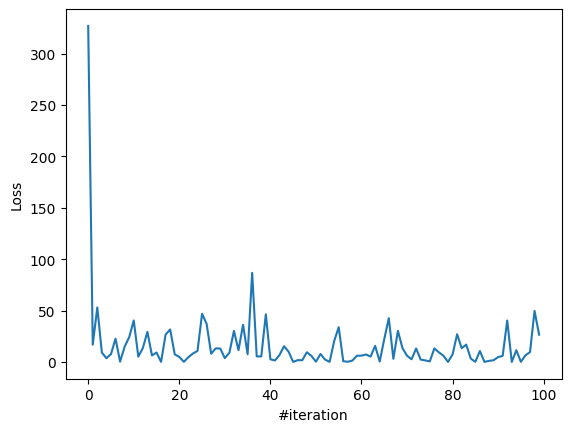

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [39]:
X, y = prepare_data("data/advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()
print(w1, w2, w3)

In [40]:
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('data/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [41]:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [66]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    losses_mae = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        loss_total_mae = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            loss_mae = compute_loss_mae(y, y_hat)

            # accumulate loss
            loss_total += loss
            loss_total_mae += loss_mae

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

            
        # update parameters
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, dl_db / N, lr)

        # logging
        losses.append(loss_total / N)
        losses_mae.append(loss_total_mae / N)
    return w1, w2, w3, b, losses, losses_mae

            
            

[172.98395547828923, 39.4111070748783, 18.15932391299888, 14.636125714137492, 13.915332964228055, 13.641547043771732, 13.44295413301911, 13.26074072139583, 13.08548706452312, 12.915571785479221, 12.750608271505744, 12.59040884785539, 12.434821201598691, 12.283702445060301, 12.136914902030528, 11.994325325599412, 11.855804661211613, 11.721227899345209, 11.590473945802076, 11.463425498132805, 11.339968926278656, 11.219994157024466, 11.103394562099565, 10.990066849804487, 10.879910960051484, 10.772829962711043, 10.66872995916016, 10.56751998693152, 10.46911192736594, 10.373420416173278, 10.28036275681042, 10.189858836587344, 10.101831045415498, 10.016204197115092, 9.93290545320084, 9.851864249067907, 9.773012222502535, 9.696283144444083, 9.621612851927608, 9.548939183138094, 9.478201914510073, 9.409342699807995, 9.342305011124989, 9.277034081739632, 9.213476850772153, 9.151581909583319, 9.091299449861236, 9.032581213342729, 8.975380443117974, 8.919651836468342, 8.865351499189215, 8.812436

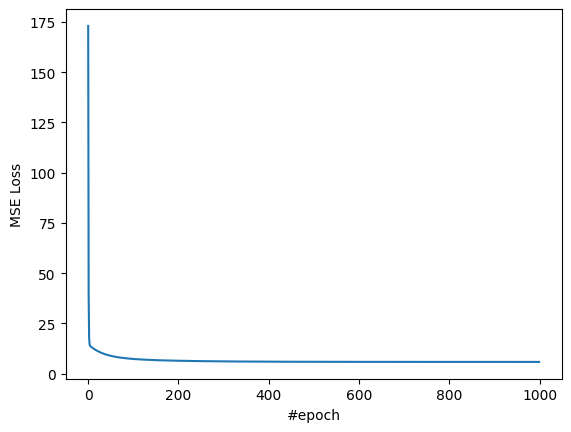

In [67]:
w1, w2, w3, b, losses, losses_mae = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [68]:
X, y = prepare_data('data/advertising.csv')
w1, w2, w3, b, losses, losses_mae = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(w1, w2, w3)

0.06715438468669876 0.15771302894031652 0.029718338420754182


[12.537758993110772, 5.905500511450339, 3.7292215279897287, 3.2802745038710244, 3.1838559967356854, 3.150633078040546, 3.128390665342625, 3.108031609445053, 3.0879714962569063, 3.068084273583358, 3.0484407447293167, 3.0290663095160824, 3.0099683751494224, 2.9911751197030862, 2.9726590484047573, 2.954412959577857, 2.936433112322608, 2.918762732091297, 2.9016115506562583, 2.8850980462930744, 2.8695917472160426, 2.8543854020920834, 2.8394658685121494, 2.82476054813002, 2.81026612548007, 2.795996094647656, 2.781953100801091, 2.768110214549142, 2.754464344640738, 2.7410124485834215, 2.7283359930895767, 2.7158754874456594, 2.7035909342292497, 2.691479622095947, 2.6796554286849847, 2.66804477284259, 2.656597439897211, 2.645478719872818, 2.6346141805797796, 2.623961519785955, 2.613457536804796, 2.6030999480103714, 2.592886505749892, 2.5828149977735206, 2.572978077832713, 2.5633249398209004, 2.553805363733778, 2.544417303136159, 2.535220647328063, 2.5262979111212434, 2.5178340566007122, 2.50948

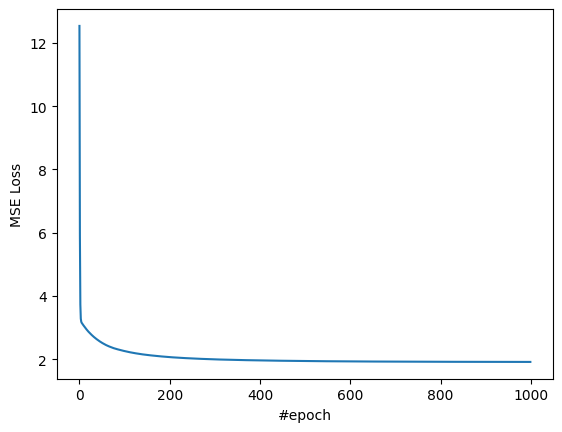

In [70]:
X, y = prepare_data('data/advertising.csv')
w1, w2, w3, b, losses, losses_mae = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(losses_mae)

plt.plot(losses_mae)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

**Câu 4**

In [75]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # Get tv (index=0)
    tv_data = get_column(data, 0)

    # Get radio (index=1)
    radio_data = get_column(data, 1)

    # Get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # Get sales (index=3)
    sales_data = get_column(data, 3)

    # Build X input and y output for training
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

def initialize_params():
    # b = 0
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    
    return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
    # return [b, w1, w2, w3]

def predict(X_features, weight):
    return sum([x * wi for x, wi in zip(X_features, weight)])

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [2 * xi * (y_hat - y) for xi in X_features]
    return dl_dweights

def update_weight(weights, dl_dweights, lr):
    weights = [wi - lr * dl_dwi for wi, dl_dwi in zip(weights, dl_dweights)]
    return weights


def implement_linear_regression(X_features, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y)
    for epoch in range(epoch_max):
        print('Epoch ', epoch)
        for i in range(N):
            features_i = X_features[i]
            y_i = y_output[i]

            y_hat = predict(features_i, weights)

            loss = compute_loss(y_hat, y_i)

            dl_weights = compute_gradient_w(features_i, y_i, y_hat)

            weights = update_weight(weights, dl_weights, lr)

            # logging
            losses.append(loss)

    return weights, losses

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Epoch  11
Epoch  12
Epoch  13
Epoch  14
Epoch  15
Epoch  16
Epoch  17
Epoch  18
Epoch  19
Epoch  20
Epoch  21
Epoch  22
Epoch  23
Epoch  24
Epoch  25
Epoch  26
Epoch  27
Epoch  28
Epoch  29
Epoch  30
Epoch  31
Epoch  32
Epoch  33
Epoch  34
Epoch  35
Epoch  36
Epoch  37
Epoch  38
Epoch  39
Epoch  40
Epoch  41
Epoch  42
Epoch  43
Epoch  44
Epoch  45
Epoch  46
Epoch  47
Epoch  48
Epoch  49


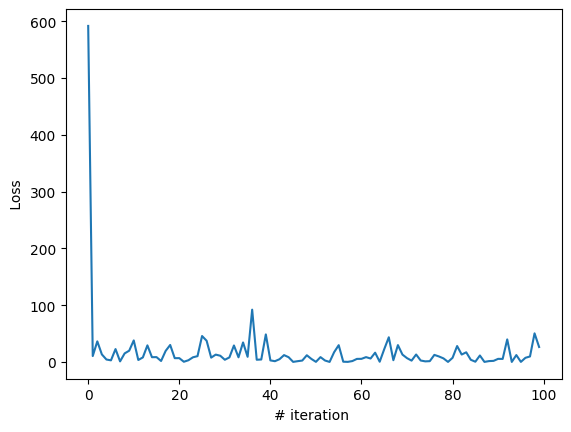

In [76]:
X, y = prepare_data("data/advertising.csv")
W, L = implement_linear_regression(X, y)
plt.plot(L[0:100])
plt.xlabel("# iteration ")
plt.ylabel(" Loss ")
plt.show()

In [77]:
X, y = prepare_data("data/advertising.csv")
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
print(L[9999])

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Epoch  11
Epoch  12
Epoch  13
Epoch  14
Epoch  15
Epoch  16
Epoch  17
Epoch  18
Epoch  19
Epoch  20
Epoch  21
Epoch  22
Epoch  23
Epoch  24
Epoch  25
Epoch  26
Epoch  27
Epoch  28
Epoch  29
Epoch  30
Epoch  31
Epoch  32
Epoch  33
Epoch  34
Epoch  35
Epoch  36
Epoch  37
Epoch  38
Epoch  39
Epoch  40
Epoch  41
Epoch  42
Epoch  43
Epoch  44
Epoch  45
Epoch  46
Epoch  47
Epoch  48
Epoch  49
31.339223408109927
